In [2]:
import pandas as pd 

df = pd.read_csv('housepricedata.csv')

df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values

In [4]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [5]:
X=dataset[:,0:10]

In [6]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [7]:
Y = dataset[:,10]

In [8]:
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(X)

In [11]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(x_scale, Y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential([
   Dense(32, activation='relu', input_shape=(10,)),
   Dense(32, activation='relu'),
   Dense(1, activation='sigmoid'),
])

In [21]:
model.compile(optimizer='sgd',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, Y_train,
         batch_size=32, epochs=100,
         validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 18ms/step - loss: 0.6829 - accuracy: 0.5166 - val_loss: 0.6877 - val_accuracy: 0.4749
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6787 - accuracy: 0.5558 - val_loss: 0.6834 - val_accuracy: 0.5571
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6753 - accuracy: 0.6419 - val_loss: 0.6801 - val_accuracy: 0.6027
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6722 - accuracy: 0.6820 - val_loss: 0.6770 - val_accuracy: 0.6667
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6691 - accuracy: 0.7231 - val_loss: 0.6740 - val_accuracy: 0.6849
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6660 - accuracy: 0.7427 - val_loss: 0.6706 - val_accuracy: 0.7169
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6626 - accuracy: 0.7701 - val_loss: 0.6674 - val_accuracy: 0.7352
Epoch 8/100


In [23]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.8767


[0.3029365837574005, 0.8767123222351074]

In [24]:
import matplotlib.pyplot as plt

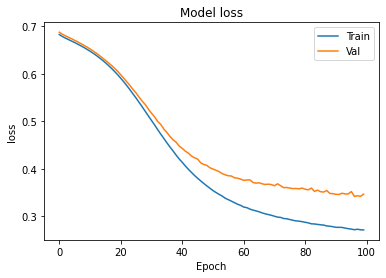

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

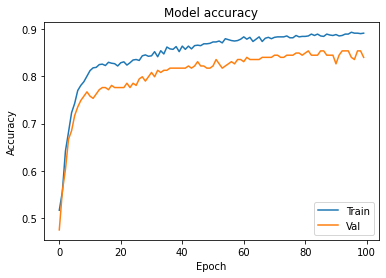

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
model_2=Sequential([
   Dense(1000, activation='relu', input_shape=(10,)),
   Dense(1000, activation='relu'),
   Dense(1000, activation='relu'),
   Dense(1000, activation='relu'),
   Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam', 
               loss='binary_crossentropy',
               metrics = ['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
         batch_size=32, epochs=100,
         validation_data=(X_val, Y_val))
            

Epoch 1/100
32/32 [==============================] - 2s 42ms/step - loss: 0.4810 - accuracy: 0.7779 - val_loss: 0.3942 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3258 - accuracy: 0.8669 - val_loss: 0.3416 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 1s 34ms/step - loss: 0.3044 - accuracy: 0.8767 - val_loss: 0.3086 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2632 - accuracy: 0.8904 - val_loss: 0.4349 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3230 - accuracy: 0.8679 - val_loss: 0.3342 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 1s 41ms/step - loss: 0.2799 - accuracy: 0.8885 - val_loss: 0.3523 - val_accuracy: 0.8493
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2390 - accuracy: 0.8885 - val_loss: 0.2735 - val_accuracy: 0.8721
Epoch 

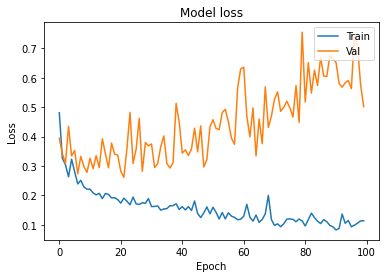

In [28]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### This is a clear sign of over-fitting. The training loss is decreasing, but the validation loss is way above the training loss and increasing(past  the inflection point of Epoch 20). if we plot accuracy using the code below

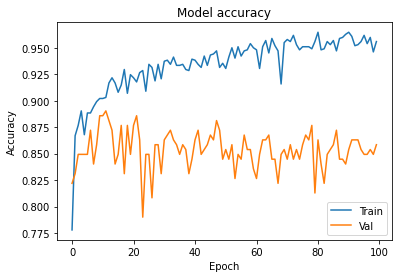

In [29]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#### We can see a clearer divergence between train and validation accuracy as well:

In [30]:
import matplotlib.pyplot as plt 

In [31]:
from keras.layers import Dropout
from keras import regularizers

In [32]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [33]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 53ms/step - loss: 14.2706 - accuracy: 0.6399 - val_loss: 3.9074 - val_accuracy: 0.7945
Epoch 2/100
32/32 [==============================] - 1s 41ms/step - loss: 1.6804 - accuracy: 0.8297 - val_loss: 0.7770 - val_accuracy: 0.8082
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5986 - accuracy: 0.8454 - val_loss: 0.5608 - val_accuracy: 0.8356
Epoch 4/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4969 - accuracy: 0.8728 - val_loss: 0.5335 - val_accuracy: 0.8402
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4945 - accuracy: 0.8748 - val_loss: 0.5626 - val_accuracy: 0.8356
Epoch 6/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4744 - accuracy: 0.8708 - val_loss: 0.5014 - val_accuracy: 0.8402
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4671 - accuracy: 0.8796 - val_loss: 0.4979 - val_accuracy: 0.8402
Epoch

#### We'll get a loss graph that looks like this:

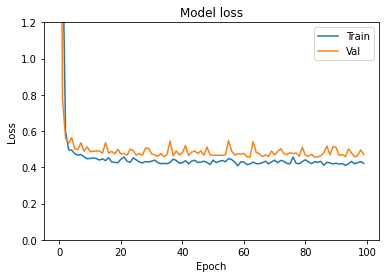

In [34]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

#### You can see that the validation loss much more closely matches our training our training loss. Let's plot the accuracy with similar code snippet:

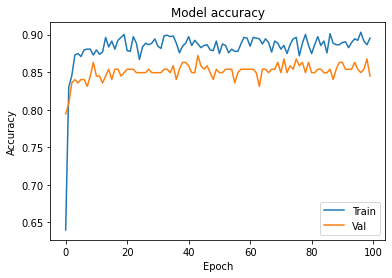

In [35]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

And We wikk get a plot like this: